#TP2 M1 info -- Introduction au traitement du signal, aux signaux sonores et aux images

**But du TP** :
* comprendre le domaine des fréquences d'une image
* Effectuer un filtrage fréquentiel sur l'image

**Avertissement** :
Il peut être tentant d'utiliser ChatGPT ou d'autres outils d'écriture de code. Mais il ne s'agit que d'une introduction, couvrant des concepts très simples pour manipuler des fichiers. Nous vous recommandons fortement de ne pas l'utiliser. Vous aurez suffisamment de temps pour réaliser par vous-même les quelques fonctions qui vous sont demandées. Et vous les assimilerez bien mieux. Vous devrez réutiliser ces fonctions pour l'évaluation, ce qui vous confrontera à de nouvelles données. Essayez donc de rendre ces fonctions aussi générales que possible.

**Astuces**:
* Essayez de faire fonctionner vos algorithmes sur n'importe quelle taille d'image.
* N'hésitez pas à créer des fonctions pour chaque partie des traitements.
* Voici un schéma des traitements à effectuer pour vous y retrouver danc ce TP :
![schéma TP](https://gitlab.com/jeromefarinas/tp-m1-ts/-/raw/main/tp2/annexes/TP2_Intro_TS.png?ref_type=heads)

In [ ]:
# OS setup
#!cat /etc/os-release
!apt-get install -q=2 tree

# Data loading
!git clone https://gitlab.com/jeromefarinas/tp-m1-ts.git

In [1]:
# Some usefull library
import matplotlib.pyplot as plt
import scipy.signal
import numpy as np
from IPython.display import Audio

##Domaine spectral d'une image

Vous allez travailler sur un extrait de l'image de [Lena](https://en.wikipedia.org/wiki/Lenna) :

![Lena extract](https://gitlab.com/jeromefarinas/tp-m1-ts/-/raw/main/tp2/lena.jpg?ref_type=heads)

In [2]:
img = plt.imread('tp-m1-ts/tp2/lena.jpg')

Il s'agit d'une image en 256 niveaux de gris. Affichez cette image avec cette carte de couleurs.

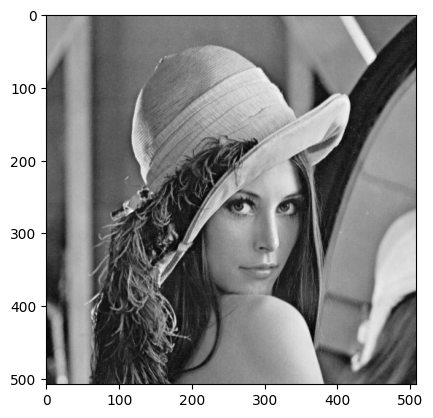

In [3]:
# à vous...
plt.imshow(img, cmap='gray')

* Calculer la représentation fréquentielle de l'image, en utilisant la transformée de Fourier discrète bidimensionnelle : [numpy.fft.fft2](https://numpy.org/doc/stable/reference/generated/numpy.fft.fft2.html)

**Attention** : le résultat est une matrice complexe de même dimension que la matrice originale !
Pour visualiser cette matrice de coefficients complexes, il faut calculer le module, puis afficher le résultat sur une échelle d'intensité logarithmique.

In [4]:
# à vous...
img_fft = np.fft.fft2(img)

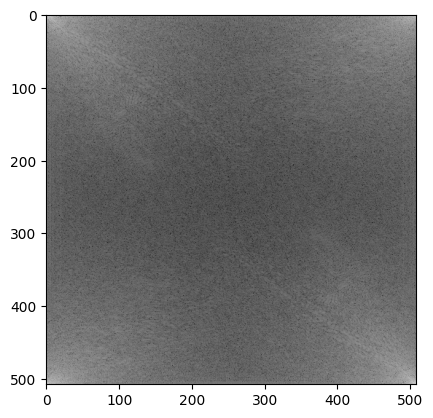

In [5]:
plt.imshow(np.log(np.abs(img_fft)), cmap='gray')

# Localisation des hautes et basses fréquences

**Attention** : la représentation Python n'est pas la représentation conventionnelle ! En image on applique un fftshift en général en plus. Ici, Ne réalisez pas cette opération pour la réponses aux question ci-dessous, sinon vous allez inverser les interprétations.

**Méthode** : retirer des zones de fréquences de l'image afin de localiser les hautes et basses fréquences.

Pour ce faire, les coefficients complexes de la représentation fréquentielle (coefficients du spectre), situés dans une zone rectangulaire (ou circulaire), sont remplacés par des 0.

Dans les 2 exemples ci-dessous, 25% des coefficients ont été supprimés.

![25% de suppression des fréquences au milieu](https://gitlab.com/jeromefarinas/tp-m1-ts/-/raw/main/tp2/tp3_1.jpg?ref_type=heads)

![25% de suppression des fréquences à l'extérieur](https://gitlab.com/jeromefarinas/tp-m1-ts/-/raw/main/tp2/tp3_2.jpg?ref_type=heads)

Pour mesurer l'impact de ce traitement, effectuez la transformée de Fourier inverse (voir [numpy.fft.ifft2](https://numpy.org/doc/stable/reference/generated/numpy.fft.ifft2.html)) et affichez l'image résultante.

In [42]:
# à vous...
x_width = img_fft.shape[1]
y_height = img_fft.shape[0]

img_sans_centre = img_fft.copy()
img_sans_centre[y_height//2-(y_height//4):y_height//2+(y_height//4), x_width//2-(x_width//4):x_width//2+(x_width//4)] = 1
img_sans_centre.shape

(508, 509)

In [165]:
def remove_center_frequency(img_fft, percent):
    y_height, x_width = img_fft.shape

    mask_height = int((percent / 100) * y_height / 2)
    mask_width = int((percent / 100) * x_width / 2)

    img_sans_centre = np.copy(img_fft)

    img_sans_centre[y_height//2-mask_height:y_height//2+mask_height, 
                    x_width//2-mask_width:x_width//2+mask_width] = 1
    return img_sans_centre
img_sans_centre = remove_center_frequency(img_fft, 50)

In [12]:
import math
def remove_center_prof(img_fft, percent):
    H = img_fft.shape[0]
    L = img_fft.shape[1]

    dh = int(np.floor(H/2 - math.sqrt(percent/100) * H/2))
    fh = int(np.floor(H/2 + math.sqrt(percent/100) * H/2))
    dl = int(np.floor(L/2 - math.sqrt(percent/100) * L/2))
    fl = int(np.floor(L/2 + math.sqrt(percent/100) * L/2))

    img_sans_centre = np.copy(img_fft)
    img_sans_centre[dh:fh, dl:fl] = 1
    return img_sans_centre
img_sans_centre = remove_center_prof(img_fft, 25)

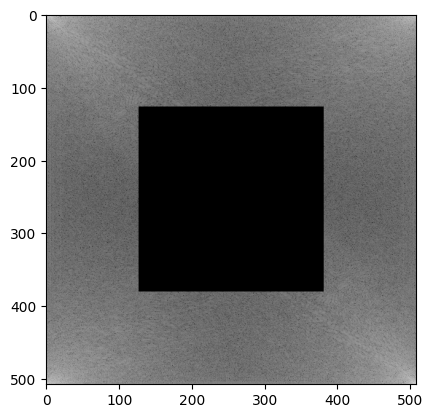

In [7]:
plt.imshow(np.log(np.abs(remove_center_prof(img_fft, 25))), cmap='gray')

In [8]:
def crop_border_percent(img, percent):
    height, width = img.shape
    mask_height = int((percent / 100) * height / 4)
    mask_width = int((percent / 100) * width / 4)

    # Create a copy of the image to avoid modifying the original
    masked_image = np.copy(img)

    # Set the border pixels to 1
    # Top and bottom borders
    masked_image[:mask_height, :] = 1
    masked_image[-mask_height:, :] = 1
    # Left and right borders
    masked_image[:, :mask_width] = 1
    masked_image[:, -mask_width:] = 1

    return masked_image

img_sans_bords = crop_border_percent(img_fft, 25)

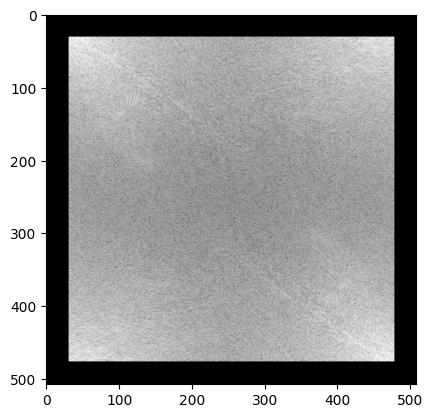

In [9]:
plt.imshow(np.log(np.abs(img_sans_bords)), cmap='gray')

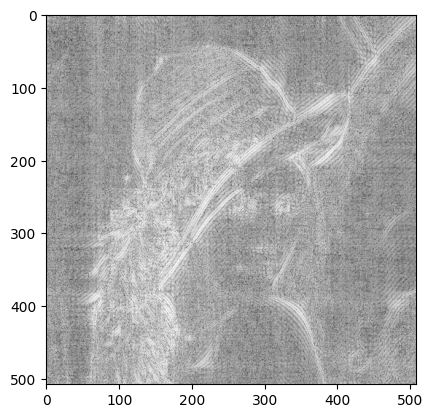

In [10]:
plt.imshow(np.log(np.abs(np.fft.ifft2(img_sans_bords))), cmap='gray')

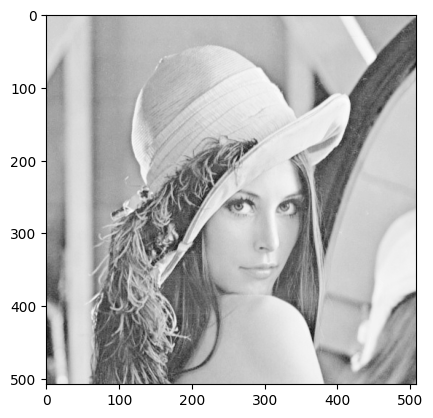

In [13]:
plt.imshow(np.log(np.abs(np.fft.ifft2(img_sans_centre))), cmap='gray')

* Où se situent les hautes et les basses fréquences ?

votre réponse...

* A partir de quel pourcentage de coefficients complexes supprimés aux basses fréquences l'image n'est-elle plus reconnaissable ?

A partir de 55-60%, l'image devient peu claire

votre réponse...

* Suggérer une configuration qui ne conserve que les contours de l'image.

Conserver que les fréquences moyennes? 

# Réduction du bruit de l'image

Nous allons essayer de débruiter l'image ci-dessous (cela correspond à un bruit poivre et sel correspondant à 5% des pixels) (située ici : tp-m1-ts/tp2/img_b.jpg)

![Lena bruitée](https://gitlab.com/jeromefarinas/tp-m1-ts/-/raw/main/tp2/img_b.jpg?ref_type=heads)

* Réduisez ce bruit à l'aide du spectre de Fourier.


In [177]:
# à vous...
bruit_img = plt.imread('tp-m1-ts/tp2/img_b.jpg')

In [178]:
bruit_fft = np.fft.fft2(bruit_img)
bruit_sans_centre = remove_center_prof(bruit_fft, 25)

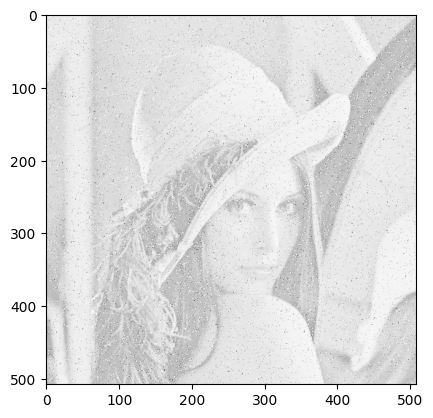

In [179]:
plt.imshow(np.log(np.abs(np.fft.ifft2(bruit_sans_centre))), cmap='gray')

* Comparez ce filtrage avec l'application d'un filtre médian 3x3 à l'image bruitée. Pour simplifier votre algorithme, vous pouvez utiliser les commandes [numpy.ravel](https://numpy.org/doc/stable/reference/generated/numpy.ravel.html) et [numpy.sort](https://numpy.org/doc/stable/reference/generated/numpy.sort.html).

In [157]:
def apply_3x3_median_filter(image):
    height, width = image.shape
    
    filtered_image = np.copy(image)

    for y in range(1, height-1):
        for x in range(1, width-1):
            neighborhood = image[y-1:y+2, x-1:x+2].ravel()
            median_value = np.sort(neighborhood)[4]  # L'index 4 est la médiane dans un tableau trié de 9 éléments
            filtered_image[y, x] = median_value

    return filtered_image


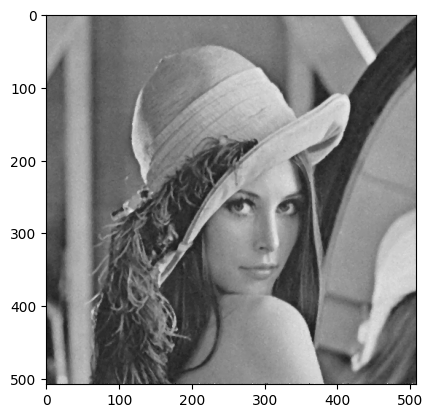

In [158]:
plt.imshow(apply_3x3_median_filter(bruit_img), cmap='gray')

Vos commentaires...